In [1]:
import sys
sys.path.insert(0, '../')

import torch
import torch.nn as nn
from functions import get_loader, plot_histories, plot_history

from ae_functions import train_autoencoder, validate_cae, visualize_latent_space, visualize_reconstruction, get_latent_dataset
from ae_models import simpleCAE

In [2]:
DEVICE = ""
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print("CUDA is available. Using GPU...")
else:
    DEVICE = torch.device("cpu")
    print("CUDA is not available. Using CPU...")

BASE_PATH = 'C:/Users/Frank/OneDrive/Bureaublad/ARC/deep-multimodal-learning/fusion'

# Define the tool names and actions
TOOL_NAMES = ['hook', 'ruler', 'spatula', 'sshot']
ACTIONS = ['left_to_right', 'pull', 'push', 'right_to_left']

# All available object names
OBJECTS = ['0_woodenCube', '1_pearToy', '2_yogurtYellowbottle', '3_cowToy', '4_tennisBallYellowGreen',
            '5_blackCoinbag', '6_lemonSodaCan', '7_peperoneGreenToy', '8_boxEgg','9_pumpkinToy',
            '10_tomatoCan', '11_boxMilk', '12_containerNuts', '13_cornCob', '14_yellowFruitToy',
            '15_bottleNailPolisher', '16_boxRealSense', '17_clampOrange', '18_greenRectangleToy', '19_ketchupToy']

sensor_color = "color"
sensor_left = "icub_left"
sensor_right = "icub_right"
sensor_depth = "depthcolormap"

BATCH_SIZE = 8
NUM_EPOCHS = 5
LR_RATE = 1e-3

train_loader = get_loader(BASE_PATH, OBJECTS, TOOL_NAMES, ACTIONS, sensor_color, "training", batch_size=BATCH_SIZE)
val_loader = get_loader(BASE_PATH, OBJECTS, TOOL_NAMES, ACTIONS, sensor_color, "validation", batch_size=BATCH_SIZE)
test_loader = get_loader(BASE_PATH, OBJECTS, TOOL_NAMES, ACTIONS, sensor_color, "testing", batch_size=BATCH_SIZE)

CUDA is available. Using GPU...


Epoch [1/5], AVG Loss: 0.6275, AVG PSNR: 23.5094, AVG SSIM: 0.7514


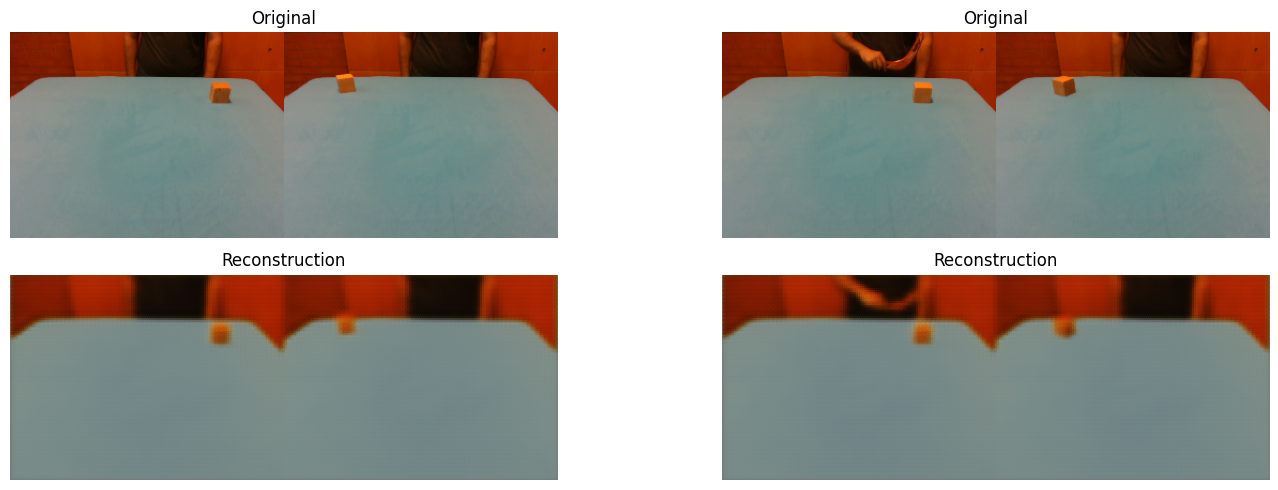

Epoch [2/5], AVG Loss: 0.6125, AVG PSNR: 28.6375, AVG SSIM: 0.8936


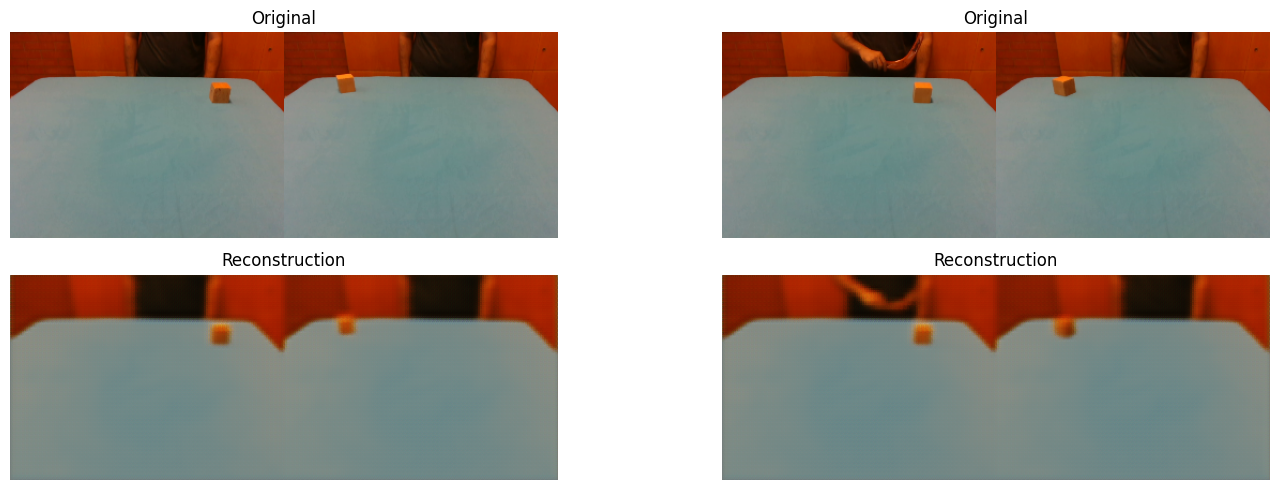

Epoch [3/5], AVG Loss: 0.6114, AVG PSNR: 30.0125, AVG SSIM: 0.9343


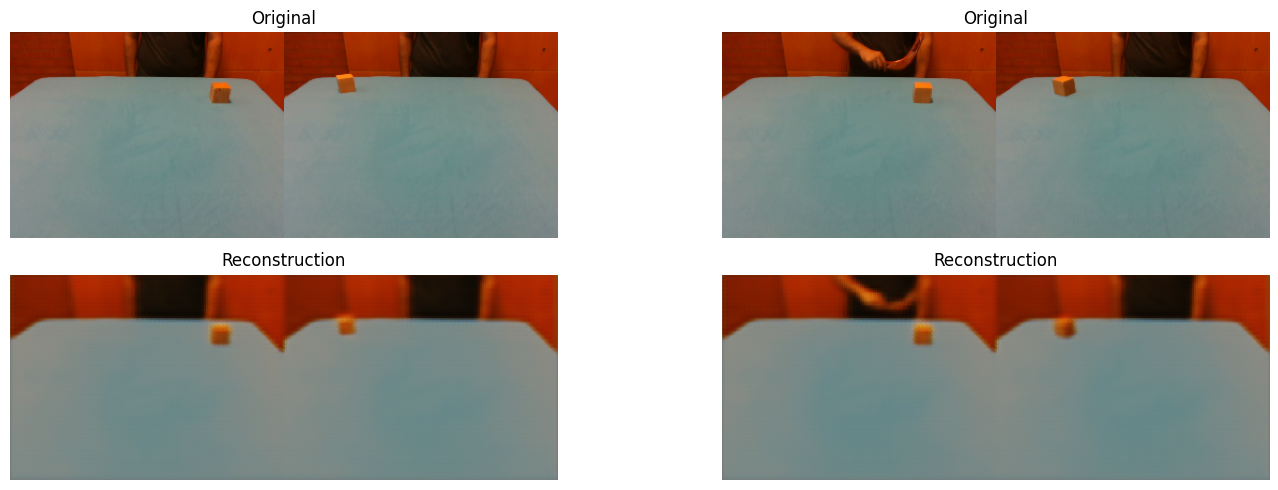

Epoch [4/5], AVG Loss: 0.6108, AVG PSNR: 30.9817, AVG SSIM: 0.9395


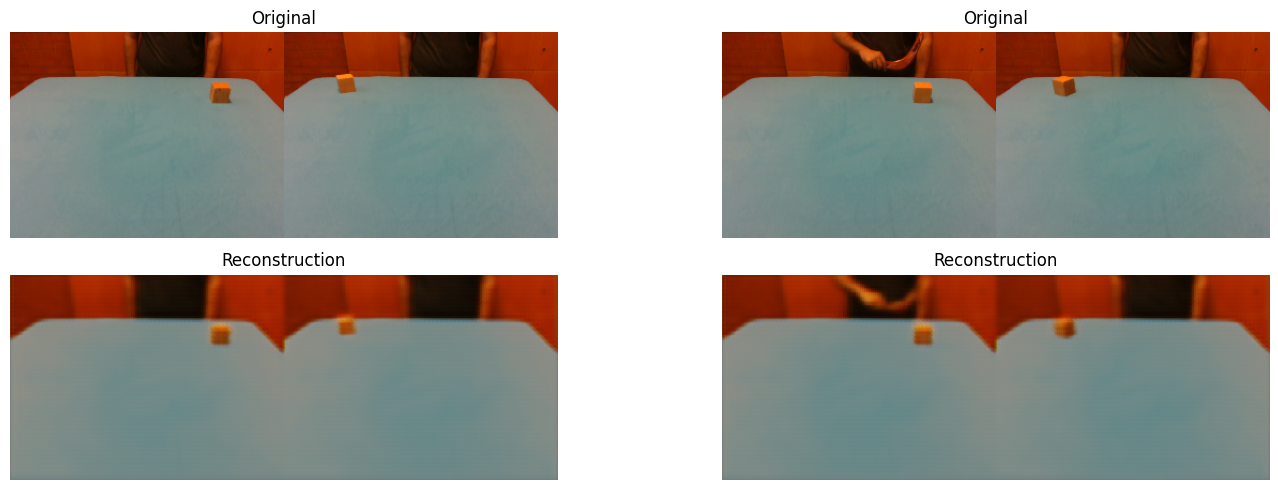

Epoch [5/5], AVG Loss: 0.6105, AVG PSNR: 31.6281, AVG SSIM: 0.9447


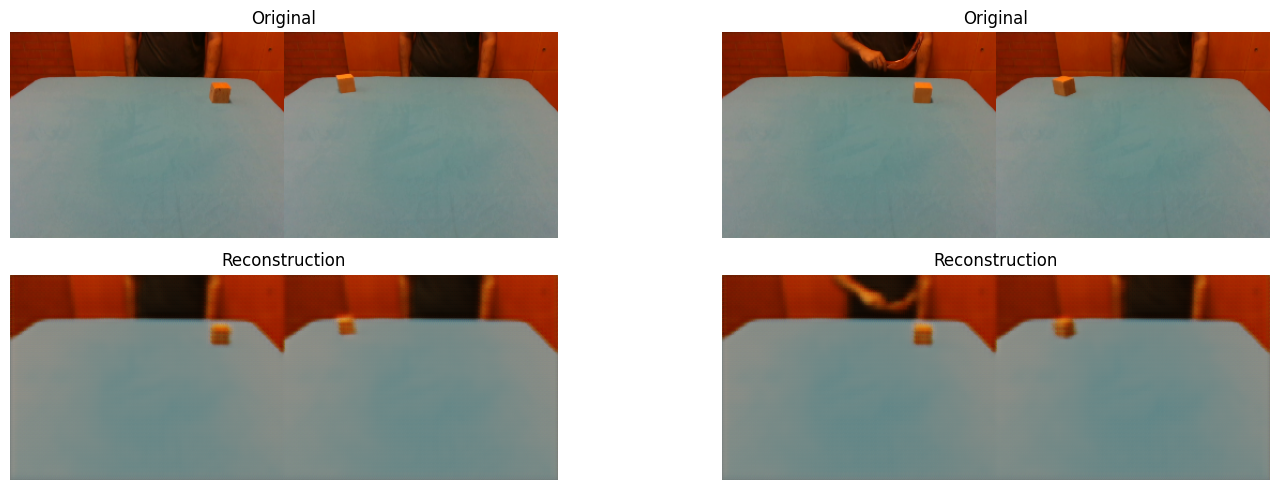

Average Validation Loss: 0.6104660734534264
Average PSNR: 31.85962755678353
Average SSIM: 0.9528130093680192


In [3]:
# cae_lossfunction = nn.MSELoss()
cae_lossfunction = nn.BCELoss()

cae = simpleCAE(input_channels=3).to(DEVICE)

optimizer= torch.optim.Adam(cae.parameters(), lr=LR_RATE)
# optimizer = torch.optim.SGD(cae.parameters(), lr=LR_RATE, momentum=0.9)
# optimizer = torch.optim.AdamW(cae.parameters(), lr=LR_RATE, weight_decay=1e-2)

trained_cae, cae_epoch_loss_history = train_autoencoder(cae,\
                                                        train_loader,\
                                                        cae_lossfunction,\
                                                        optimizer,\
                                                        is_depth=False,\
                                                        num_epochs=NUM_EPOCHS,\
                                                        device=DEVICE,\
                                                        visualize=True)

avg_val_loss, cae_validation_loss_history = validate_cae(trained_cae,\
                                                        test_loader,\
                                                        cae_lossfunction,\
                                                        is_depth = False,\
                                                        device = DEVICE)

In [ ]:
# visualize_reconstruction(trained_cae, test_loader, num_samples=2)
# visualize_latent_space(trained_cae, test_loader, n_components=2)

In [4]:
model_path = "C:/Users/Frank/OneDrive/Bureaublad/ARC/deep-multimodal-learning/weights_ae/"
weight_name = "simple/simple_cae_ne5_b8_color.pth"
torch.save(trained_cae.state_dict(), model_path+weight_name)